# Developing a CNN3D model using ManufacturingNet
###### To know more about the manufacturingnet please visit: http://manufacturingnet.io/ 

In [1]:
import ManufacturingNet
import numpy as np

First we import manufacturingnet. Using manufacturingnet we can create deep learning models with greater ease.



It is important to note that all the dependencies of the package must also be installed in your environment 

##### Now we first need to download the data. You can use our dataset class where we have curated different types of datasets and you just need to run two lines of code to download the data :)

In [2]:
from ManufacturingNet import datasets

In [3]:
datasets.LithographyData()

###### Alright! Now please check your working directory. The data should be present inside it. That was super easy !!

The Lithography dataset has more than 30000 data points. Its a classification problem. Every data point has a sequence of frames captured during the curing process. By analysing these temporally related frames, we will try to classify it in one of the 3 classes (uncured, cured, damaged).

In [4]:
# Lets load the data
X =  np.load('./Lithography files/input_data.npy')
Y = np.load('./Lithography files/labels.npy')

##### For demonstration purpose, we will use just 100 points

In [5]:
X=X[:100]
Y=Y[:100]

One thing to note here, each data point X is in the format of (Depth, Inchannel, Height, Width). Since, CNN3D model requires data in (Inchannel, depth, height, width) format, we need to do some preprocessing to the input data.

In [6]:
#Preprocessing X
X_new=[]
for i in range(X.shape[0]):
    temp=np.transpose(X[i],(1,0,2,3))
    X_new.append(temp)
X_new=np.array(X_new)

In [7]:
X_new.shape

(100, 1, 10, 110, 110)

##### We have preprocessed the data in the correct format. 

#### Now all we got to do is import the CNN3D class and answer a few simple questions and we will be all set. The manufacturingnet has been designed in a way to make things easy for user and provide them the tools to implement complex used

In [8]:
from ManufacturingNet.models import CNN3D

###### We import the CNN3D model from package and answer a few simple questions

Do you want default values for all the training parameters (y/n)? n
Question [1/9]: No of classes:


Please enter the number of classes for classification 
 Enter 1 if you are dealing with a regression problem: 3


Question [2/9]: Design Architecture: 


NOTE: CNN3D convolution layers requires high memory, recommended not more 3 conv3d layers.


Question: Number of Convolution Layers:


Please enter the number of conv_layers: 2


Question: Default value:


Do you want default values for convolution layers (y/n): n


Designing the 1 convolution block
Question: Out-channels for this conv:


Please enter the number of out channels: 1


Question: Kernel Size for this conv


Please enter the kernel size (depth,heigth,width)
For example 3,3,3
For default size, please directly press enter without any input: 1, 10, 10


Question: Stride value for this conv:


Please enter the stride (depth,heigth,width)
For example 1,1,1
For default size, please directly press enter without any input: 1, 5, 5


Validation Loss:  1.3706813462011155e-13
Validation Accuracy:  100.0 %
Current scheduler status:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.001
    lr: 0.0001
    weight_decay: 0
)
Epoch Time:  0.16655325889587402 s
##################################################
Epoch_Number:  2
Training Loss:  0.0010451143576049495
Training Accuracy:  94.16666666666667 %
Validation Loss:  1.552945413238589e-07
Validation Accuracy:  100.0 %
Current scheduler status:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.001
    lr: 0.0001
    weight_decay: 0
)
Epoch Time:  0.18650102615356445 s
##################################################
Epoch_Number:  3
Training Loss:  0.00022683514661925828
Training Accuracy:  95.625 %
Validation Loss:  0.00015830504348021045
Validation Accuracy:  100.0 %
Current scheduler status:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
   

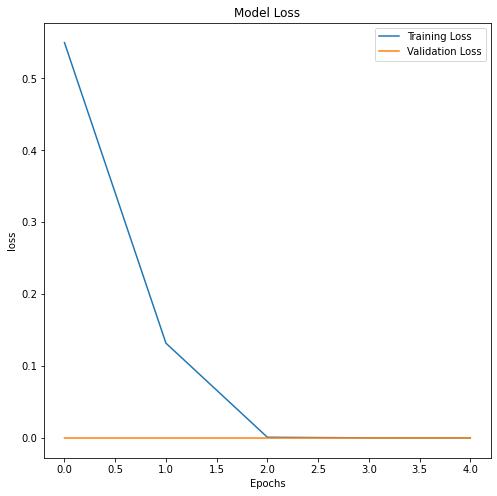

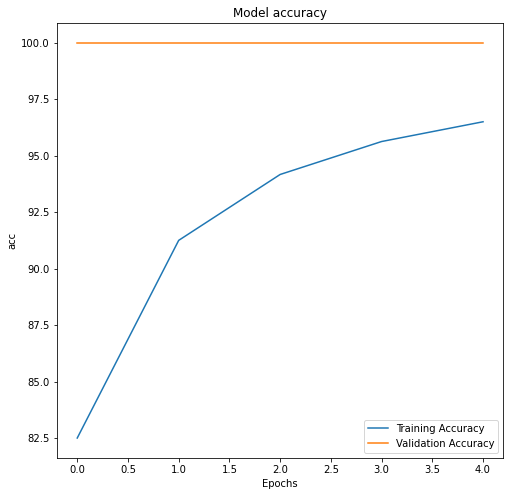

In [9]:
model=CNN3D(X_new,Y)

Alright! Its done you have built your CNN3D network using the manufacturingnet package. Just by answering a few simple questions. It is really easy

A few pointers about developing the CNN3D model. The CNN3D model is very high in terms of memory and computation.The number of convolution layers, activations, batch size, batch normalization and drop out(if any), loss functions, optimizer, epochs, scheduler should be chosen by the user

The model summary, training accuracy, validation accuracy, confusion matrix, Loss  vs epoch are also provided by the package.